In [1]:
import sys

sys.path.append("..")
sys.path.append("../../")
sys.path.append("../../src")

import os
import matplotlib.pyplot as plt
from functional_autoencoders.util import pickle_load

In [2]:
DATA_OUTPUT_DIR = "../../tmp/experiments/exp_train_vs_inference_wall_clock/data"

wall_clock_times = {
    "training": {},
    "inference": {},
}

for run_idx_str in os.listdir(DATA_OUTPUT_DIR):
    for train_point_ratio in os.listdir(os.path.join(DATA_OUTPUT_DIR, run_idx_str)):
        result = pickle_load(
            os.path.join(DATA_OUTPUT_DIR, run_idx_str, train_point_ratio, "data.pickle")
        )
        training_time = result["additional_data"]["training_time"]
        inference_time = result["additional_data"]["inference_time"]
        train_point_ratio = result["additional_data"]["train_point_ratio"]

        if train_point_ratio not in wall_clock_times["training"]:
            wall_clock_times["training"][train_point_ratio] = []

        if train_point_ratio not in wall_clock_times["inference"]:
            wall_clock_times["inference"][train_point_ratio] = []

        wall_clock_times["training"][train_point_ratio].append(training_time)
        wall_clock_times["inference"][train_point_ratio].append(inference_time)

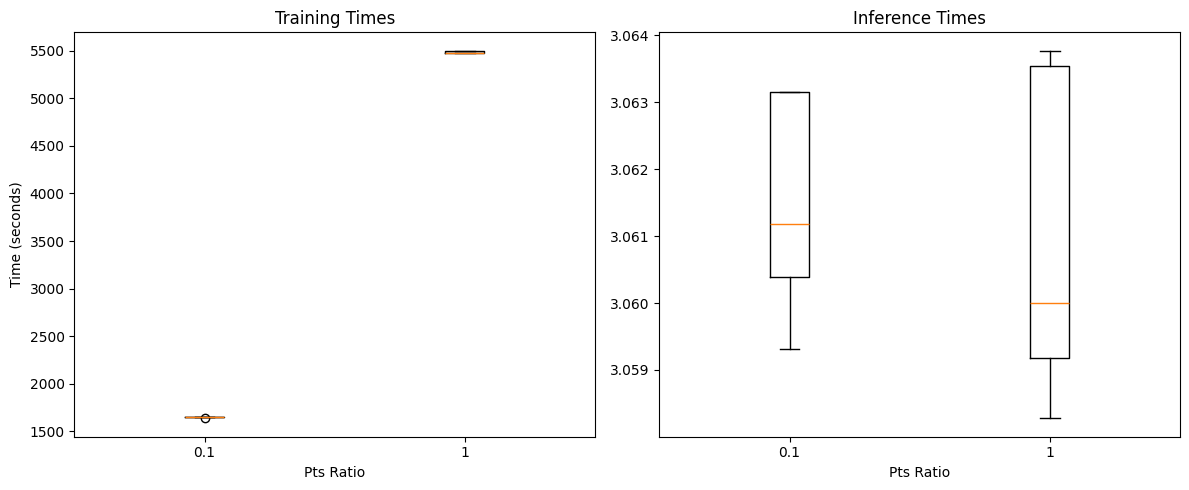

In [3]:
pts_ratios = sorted(wall_clock_times["training"].keys())
training_times = [wall_clock_times["training"][bs] for bs in pts_ratios]
inference_times = [wall_clock_times["inference"][bs] for bs in pts_ratios]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].boxplot(training_times, tick_labels=pts_ratios)
axs[0].set_title("Training Times")
axs[0].set_xlabel("Pts Ratio")
axs[0].set_ylabel("Time (seconds)")

axs[1].boxplot(inference_times, tick_labels=pts_ratios)
axs[1].set_title("Inference Times")
axs[1].set_xlabel("Pts Ratio")

plt.tight_layout()
plt.show()